<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/08_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像の分割

In [ ]:
!wget https://storage.googleapis.com/iotcolab2023/020234399.jpg -O a.jpg

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
# 定義：画像のリサイズ
def imResize(src):
  baseSize = 480
  h, w = src.shape[:2]

  maxSize = max(h, w)
  aspect = baseSize / maxSize
  dst = cv2.resize(src, (int(w * aspect), int(h * aspect)))
  return dst

In [ ]:
# 画像の読み込み

img = cv2.imread('a.jpg')
img = imResize(img)

In [ ]:
# グレースケール変換する
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
# 画像を分割する

rows = 5  # 行数
cols = 4  # 列数

chunks = []
for row_img in np.array_split(img, rows, axis=0):
  for chunk in np.array_split(row_img, cols, axis=1):
    chunks.append(chunk)

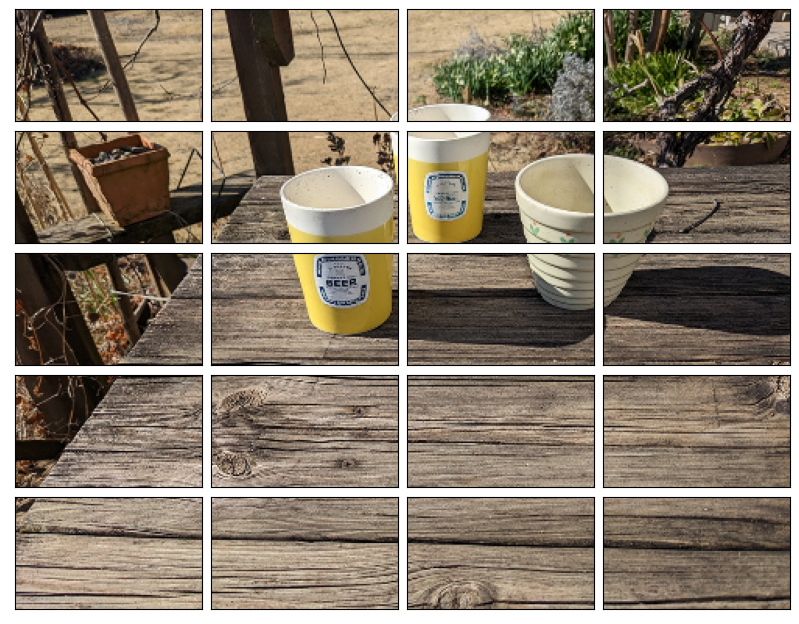

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for i in range(len(chunks)):
  plt.subplot(rows, cols, i+1)
  plt.imshow(cv2.cvtColor(chunks[i], cv2.COLOR_BGR2RGB))
  plt.title('')
  plt.xticks([])
  plt.yticks([])